In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')
copy_df = df['placement_exam_marks']

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


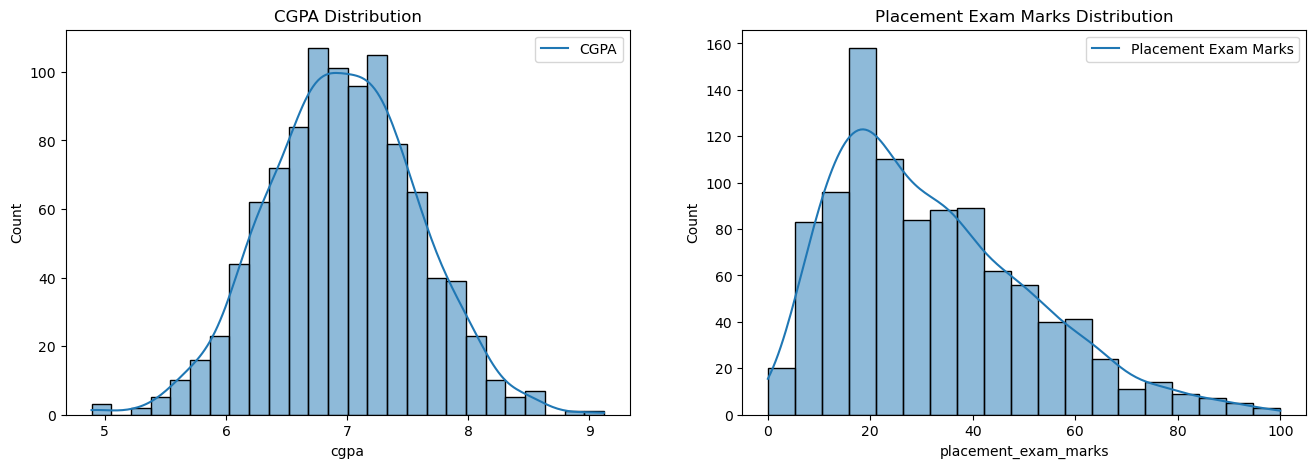

In [6]:
fig, axis = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df['cgpa'], kde=True,  ax=axis[0])
axis[0].set_title("CGPA Distribution")
axis[0].legend(["CGPA"])

sns.histplot(df['placement_exam_marks'], kde=True, ax=axis[1])
axis[1].set_title("Placement Exam Marks Distribution")
axis[1].legend(["Placement Exam Marks"])

plt.show()


### In above figs as we can see cgpa is correct without outliers so we only need to focus on placement_marks

<Axes: xlabel='placement_exam_marks'>

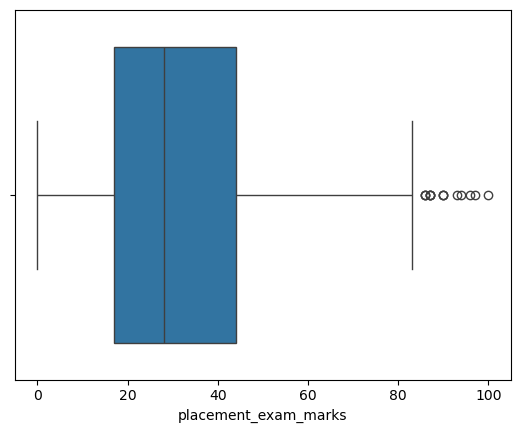

In [7]:
sns.boxplot(x = df['placement_exam_marks'])

# Now i'm gonna calculate IQR and find outliers

In [8]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
print(percentile25, "|",  percentile75)

17.0 | 44.0


In [9]:
iqr = percentile75 - percentile25
iqr

27.0

In [10]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print("Now values above upper_limit and bellow lower_limit will be considerd as outliers:\n", upper_limit, lower_limit)

Now values above upper_limit and bellow lower_limit will be considerd as outliers:
 84.5 -23.5


### To check how many values are above upper_limit:

In [11]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### To check how many values are bellow lower_limit:

In [12]:
print("No value will be less then lower_limit")
df[df['placement_exam_marks'] < lower_limit]

No value will be less then lower_limit


,cgpa,placement_exam_marks,placed


# Capping:

In [13]:
df['placement_exam_marks'] = np.where(
        df['placement_exam_marks'] > upper_limit,
        upper_limit,
        df["placement_exam_marks"]
)

In [14]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


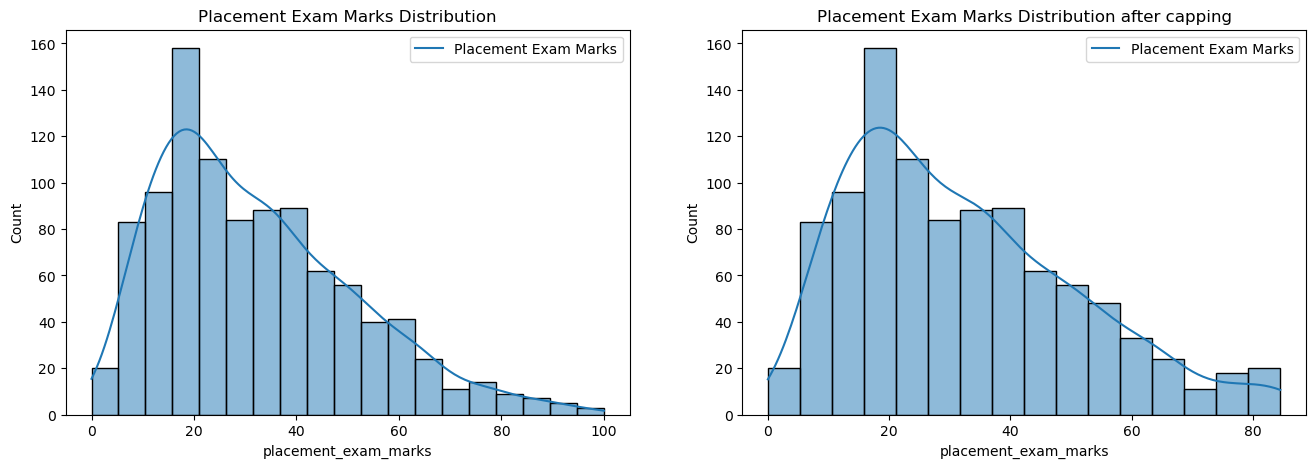

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(copy_df, kde=True, ax=axis[0])
axis[0].set_title("Placement Exam Marks Distribution")
axis[0].legend(["Placement Exam Marks"])

sns.histplot(df['placement_exam_marks'], kde=True, ax=axis[1])
axis[1].set_title("Placement Exam Marks Distribution after capping")
axis[1].legend(["Placement Exam Marks"])

plt.show()


outliers has been removed


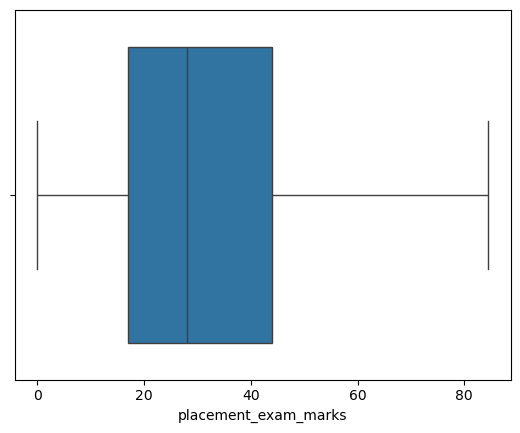

In [17]:
sns.boxplot( x = df['placement_exam_marks'])
print("outliers has been removed")

# Trimming:

In [18]:
df = df.query('@lower_limit < placement_exam_marks < @upper_limit')

In [19]:
df.shape

(985, 3)

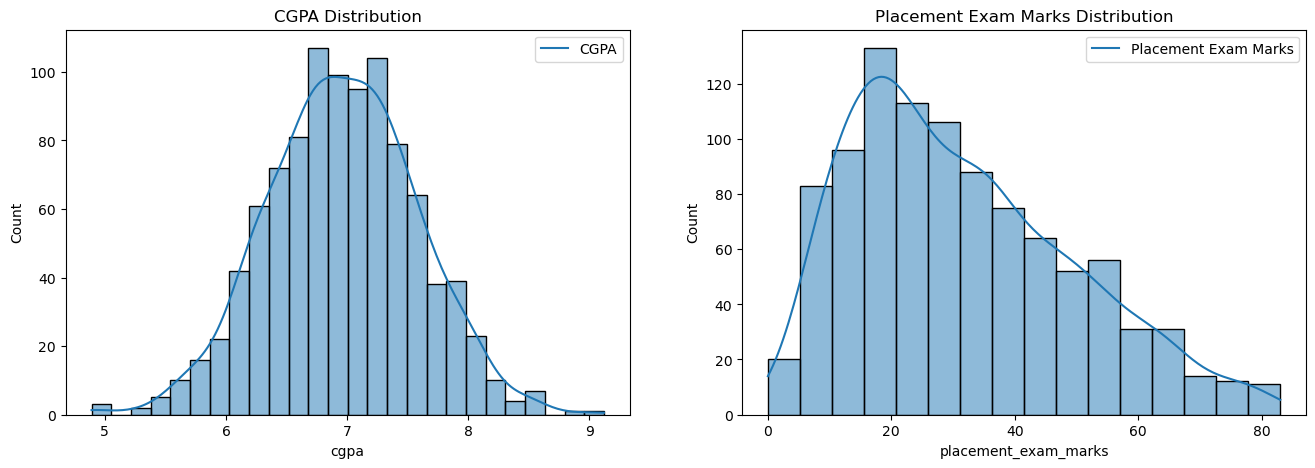

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df['cgpa'], kde=True,  ax=axis[0])
axis[0].set_title("CGPA Distribution")
axis[0].legend(["CGPA"])

sns.histplot(df['placement_exam_marks'], kde=True, ax=axis[1])
axis[1].set_title("Placement Exam Marks Distribution")
axis[1].legend(["Placement Exam Marks"])

plt.show()
